In [27]:
import pandas as pd
df = pd.read_csv('C:/Users/Awesomemin/Desktop/연구아카이브/Time_Series_with_Python/data/exchrt.csv')
df

,Date,Rate
0,2024-01-02,"1,289.40"
1,2024-01-03,"1,299.30"
2,2024-01-04,"1,308.80"
3,2024-01-05,"1,310.20"
4,2024-01-08,"1,313.70"
...,...,...
240,2024-12-24,"1,449.30"
241,2024-12-26,"1,453.60"
242,2024-12-27,"1,462.90"
243,2024-12-30,"1,474.10"


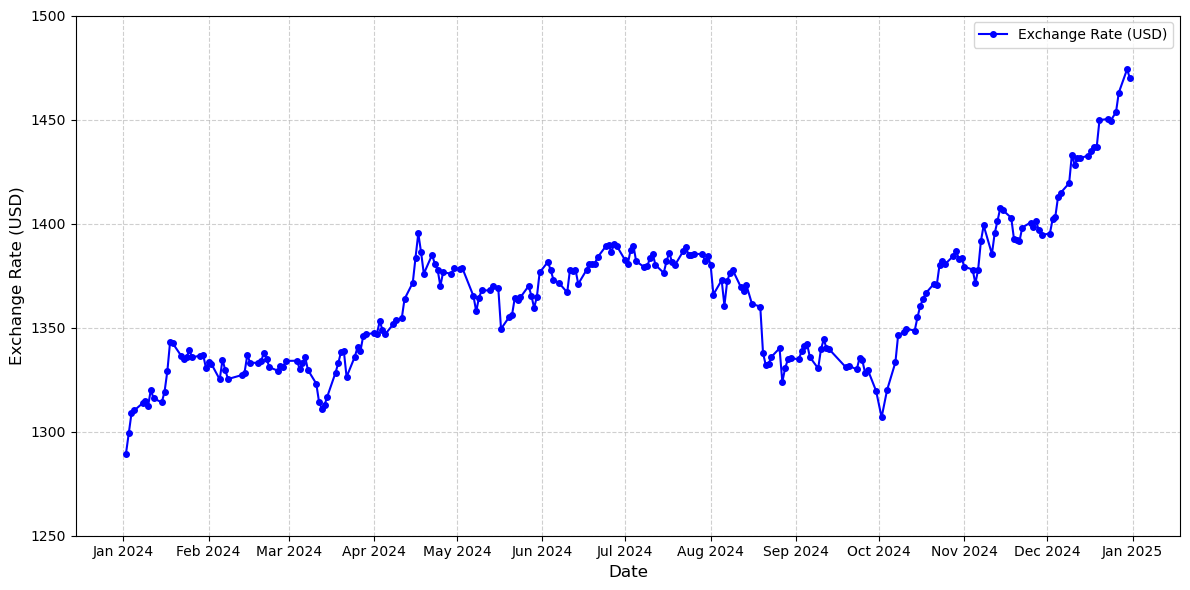

In [28]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Date 열을 datetime 형식으로 변환
df['Date'] = pd.to_datetime(df['Date'])

# Rate 열에서 쉼표 제거 후 float으로 변환
df['Rate'] = df['Rate'].replace(',', '', regex=True).astype(float)

# Date 기준으로 정렬
df = df.sort_values(by='Date')

# 시각화
fig, ax = plt.subplots(figsize=(12, 6))

# 그래프 그리기
ax.plot(df['Date'], df['Rate'], label='Exchange Rate (USD)', color='blue', marker='o', markersize=4)

# X축 포맷 조정: 일정 간격으로 표시
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # 한 달 간격
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # 월과 연도 형식 (예: Jan 2024)

# Y축(수직축) 구간 나누기: 데이터 범위에 따라 설정
y_min, y_max = df['Rate'].min(), df['Rate'].max()  # 데이터의 최소값과 최대값
y_ticks = range(int(y_min // 50) * 50, int(y_max // 50) * 50 + 51, 50)  # 50 단위로 구간 설정
ax.set_yticks(y_ticks)

# 축 설정
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Exchange Rate (USD)', fontsize=12)

# 격자 추가
plt.grid(True, linestyle='--', alpha=0.6)

# 범례 추가
plt.legend(fontsize=10)

# 레이아웃 조정 및 표시
plt.tight_layout()
plt.show()

In [30]:
# ADF Test
from statsmodels.tsa.stattools import adfuller
ADF_result = adfuller(df['Rate'])

print(f'ADF Statistics: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}') 

ADF Statistics: -0.5421596165300656
p-value: 0.8835234752618691


In [32]:
# 차분
import numpy as np
diff_Rate = np.diff(df['Rate'], n = 1)

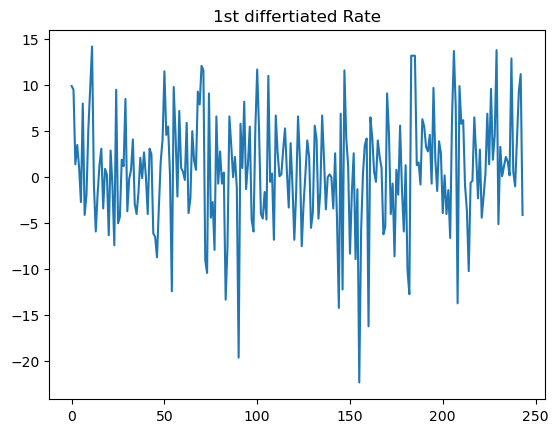

In [33]:
# 차분된 환율 시각화 
plt.plot(diff_Rate)
plt.title("1st differtiated Rate")
plt.show()

In [34]:
diff_ADF_result = adfuller(diff_Rate)

print(f'ADF Statistics: {diff_ADF_result[0]}')
print(f'p-value: {diff_ADF_result[1]}') 

ADF Statistics: -14.532305660315044
p-value: 5.3071179941081164e-27


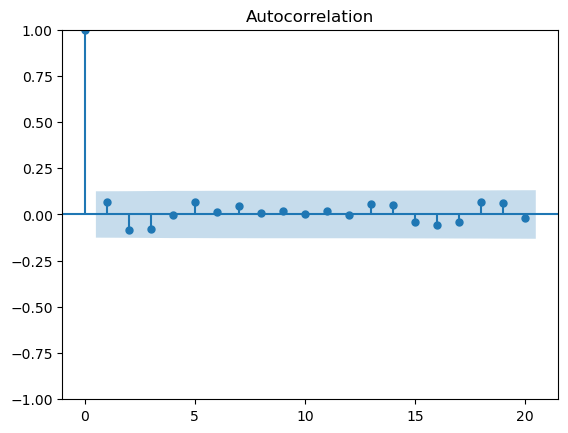

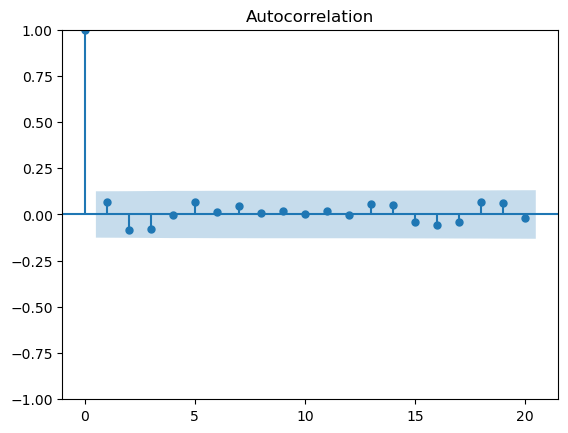

In [53]:
# ACF 시각화
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diff_Rate, lags = 20)